# **(Model Building and Prediction(Machine Learning )**

## Objectives 
* Build predictive models to forecast retail sales performance. 
* Identify key drivers influencing sales outcomes. 
* Evaluate and compare model performance to determine the most accurate predictor. 
* Prepare model insights for Power BI intergration and business reporting. 

Inputs 
* Cleaned dataset:'data/processed/cleaned_sales_data.csv'
* Derived features from exploratory analysis (e.g., category, region,segment,etc.)

Outputs 
* Trained regression/classification model (S). 
* Model Evaluation metrics (MAE,RMSE,R,)
 Accuracy). 
 Feature importance visualisation for business interpretation. 
 Predictions datset for Power BI visualisation. 

 ### Additional Comments 
 * This notebook focused on applying machine learning models such as linear regression , Secision Tree and Random Forest to predict sales. 
 Models are evaluated based on predictive accuracy and interpretability for business use. 
 Ensures results are exportble for Power BI dashboards and decision-support systems. 




In [23]:
# import libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score,mean_squared_error

In [24]:
# Load cleaned dataset
df=pd.read_csv('../data/processed/cleaned_sales_data.csv')
df.head()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales
0,1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,2017-12-06,NaN,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,2016-11-10,NaN,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,2016-11-10,NaN,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


---

In [25]:
# Add synthetic predictor columns (for dommonstratrion purpose only)
import numpy as np 
import pandas as pd 
np.random.seed(42) 

# safety: ensures Sales exists and is numeric 
assert 'Sales' in df.columns,"Sales column not found -load my dataset first."
df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')

# Check and add synthetic versions if missing
added_columns =[]

if 'Quantity' not in df.columns:
    # simulate purchase quantities ( 1 to 10 items)
    df['Quantity'] = np.random.randint(1, 10,len (df))
    added_columns.append('Quantity')

if 'Discount' not in df.columns:
   # simulate discount rates (0%-40%)
   df ['Discount'] = np.round(np.random.uniform(0, 0.4,len(df)), 2)
   added_columns.append('Discount')

   if 'Profit' not in df.columns:
      # simulate profit based on sales and discount (5-30% margin)
      df ['Profit'] = df['Sales'] * (1- df['Discount']) * np.random.uniform(0.5, 0.3,len(df))
      added_columns.append('Profit')

if added_columns:
   print(f" synthetic columns generated for demo: {', '.join(added_columns)}")
else:
   print (" All required numeric predictors alreadt exist.")
     





 synthetic columns generated for demo: Quantity, Discount, Profit


# Section 1: Data Preparation 
In this section, I'll prepare the dataset for modeling by selecting relevant features and encoding categorical variables where neccesary. 

In [26]:

features=['Quantity', 'Discount', 'Profit']
target = 'Sales'

# Drop rows with missing values in these columns 
df_model = df.dropna(subset=features+[target])

# Feature matrix and target vector
x = df_model[features]
y = df_model[target]

# Split data into training and testing sets 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

x_train.shape, x_test.shape

((7840, 3), (1960, 3))

In [27]:
###  Section 2: Model Training 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np 

# Initialise and train the model 
model = LinearRegression() 
model.fit(x_train, y_train)
# Make predictions)
y_pred = model.predict(x_test)

# Evaluate performance 
mae = mean_absolute_error (y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score (y_test, y_pred)

print("Model performance:")
print("MAE:", mae, "RMSE", rmse, "R2:", r2)

Model performance:
MAE: 53.768709604003284 RMSE 170.90281895028818 R2: 0.956301941676476


In [28]:
print ("Model performanve:")
print (f"MAE:{mae:.2f}")
print (f"RMSE:{rmse:.2f}")
print (f"R2 Score:{r2:.3f}")

Model performanve:
MAE:53.77
RMSE:170.90
R2 Score:0.956


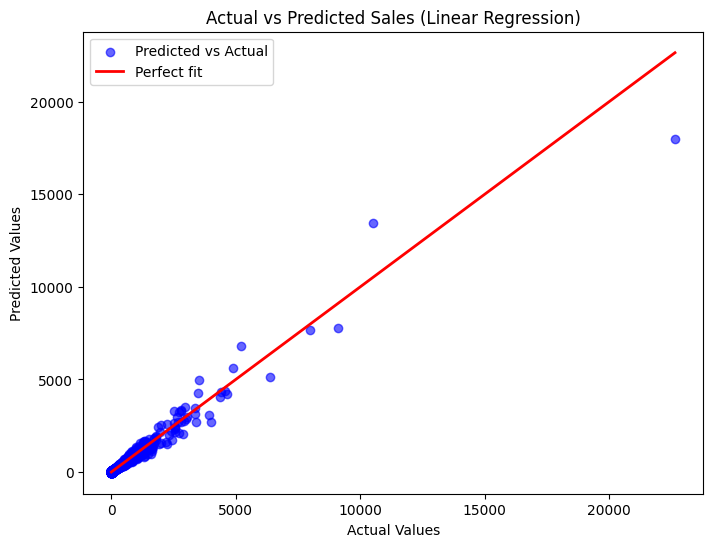

In [29]:
### Section 3: Add Visualisation (actual vs Predicted)
import matplotlib.pyplot as plt 
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', label = 'Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(),y_test.max()], color='red', linewidth=2, label='Perfect fit')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Sales (Linear Regression)")
plt.legend()
plt.show()

---

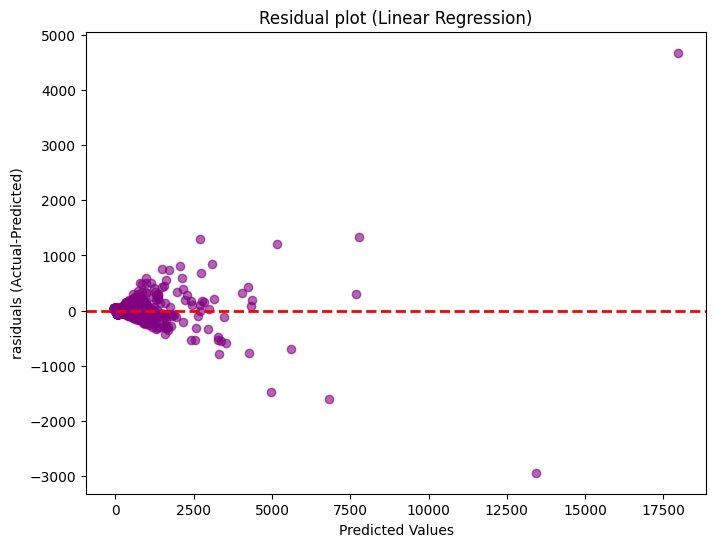

In [30]:
## #  Residual plot 
residuals = y_test - y_pred 

plt.figure (figsize = (8,6))
plt.scatter (y_pred , residuals, alpha=0.6 , color = 'purple')
plt.axhline(0, color='Red', linestyle= '--', lw=2)
plt.xlabel("Predicted Values")
plt.ylabel("rasiduals (Actual-Predicted)")
plt.title("Residual plot (Linear Regression)")
plt.show()

### Section 4: Conclusions and Next Steps 
** Model Evaluation Summary:**
- Mean absolute error (MAE): 53.77
- Root Mean Squared Error (RMSE): 170.90
R" score: 0.956

The R2 value of 0.96 indicates that the Linear Regression model explains about 96% of the variance in the sales data, which is excellent. 


** Residual Analysis** 
- The residuals are mostly centered around zero with no pattern, suggesting that the model fits the data well. 
- A few ouliers exist at higher predicted values , which may correspond to unsual sales spkes. 

**Next Steps** 
- Investigate potential outliers or extrem sales records.
- Try feature engineering (e.g., adding holidays , promotions, wether effects). 
-Compare Linear Regression performance with other models (e.g., Decision Tress , Random forest or CGBoost). 
- Deploy the best model into a production or dashboard environment for forcasting future sales. 

